In [ ]:
#Part 1
#import

from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D, Flatten, Dense,UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Part 1
#classs


class AutoEncoder:
    def ___init(self):
        self.x_train=None
        self.x_test=None
        self.x_train_noisy=None
        self.x_test_noisy=None
        self.Model=None
        self.encode = None
        self.encoded_imgs = None
        self.predicted = None
        self.history = None

    def CreateNetwork(self):
        #Encoder Definition
        print("Creating Network...")
        input_img = layers.Input(shape=(784,))
        Encoder = layers.Dense(400, activation='relu')(input_img)
        Encoder = layers.Dense(100, activation='relu')(Encoder)
        LatentSpace = layers.Dense(65, activation='relu')(Encoder)




        # Decoder Definition
        Decoder = layers.Dense(100, activation='relu')(LatentSpace)
        Decoder = layers.Dense(400, activation='relu')(Decoder)
        decoded = layers.Dense(784, activation='relu')(Decoder)

        self.Model = keras.Model(input_img, decoded)
        self.encode = keras.Model(input_img, LatentSpace)
        self.Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def Train_With_noise(self,_epochs=20):
        print("Training Network")
        self.history= self.Model.fit(self.x_train_noisy, self.x_train,
                    epochs=_epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(self.x_test_noisy, self.x_test),
                    callbacks=[TensorBoard(log_dir='C://Users//alireza//Desktop//log', histogram_freq=0, write_graph=False)])

        self.encoded_imgs = self.encode.predict(self.x_test)
        self.predicted = self.Model.predict(self.x_test)

    def Train(self,_epochs=20):
        print("Training Network")
        self.history = self.Model.fit(self.x_train, self.x_train,
                    epochs=_epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(self.x_test, self.x_test),
                    callbacks=[TensorBoard(log_dir='C://Users//alireza//Desktop//log', histogram_freq=0, write_graph=False)])

        self.encoded_imgs = self.encode.predict(self.x_test)
        self.predicted = self.Model.predict(self.x_test)

    def PrepareDataset(self):
        (self.x_train, _), (self.x_test, _) = fashion_mnist.load_data()
        self.x_train = self.x_train.astype('float32') / 255.
        self.x_test = self.x_test.astype('float32') / 255.

        self.x_train = self.x_train.reshape((len(self.x_train), np.prod(self.x_train.shape[1:])))
        self.x_test = self.x_test.reshape((len(self.x_test), np.prod(self.x_test.shape[1:])))

    def Display(self):
        print("Showing Images")
        plt.figure(figsize = (40, 4))
        for i in range(10):
            #display original images
            ax = plt.subplot(3, 20, i+1)
            plt.imshow(self.x_test[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            #disply encoded images
            ax = plt.subplot(3, 20, i+1+20)
            plt.imshow(self.encoded_imgs[i].reshape(13,5))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            #display reconstruction images
            ax = plt.subplot(3, 20 , 2*20+i+1)
            plt.imshow(self.predicted[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

    def FaultInject(self,noise_factor = 0.5):

        self.x_train_noisy = self.x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_train.shape)
        self.x_test_noisy = self.x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_test.shape)

        self.x_train_noisy = np.clip(self.x_train_noisy, 0., 1.)
        self.x_test_noisy = np.clip(self.x_test_noisy, 0., 1.)

    def evaluation(self):
        plt.figure(figsize=(14,5))
        plt.subplot(1,2,1)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.subplot(1,2,2)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        print(f'Training Loss: {self.history.history["loss"][-1]}')
        print(f'Training Accuracy: {self.history.history["accuracy"][-1]}')
        print(f'Validation Loss: {self.history.history["val_loss"][-1]}')
        print(f'Validation Accuracy: {self.history.history["val_accuracy"][-1]}')

    def CreateNetwork_with_batch_regul(self):
        print("Creating Network with Batch Normalization and Regularization...")
        input_img = layers.Input(shape=(784,))
        Encoder = layers.Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)
        Encoder = BatchNormalization()(Encoder)
        Encoder = layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Encoder)
        Encoder = BatchNormalization()(Encoder)
        LatentSpace = layers.Dense(65, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Encoder)#buttle neck layer
        LatentSpace = BatchNormalization()(LatentSpace)

        Decoder = layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01))(LatentSpace)
        Decoder = BatchNormalization()(Decoder)
        Decoder = layers.Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Decoder)
        Decoder = BatchNormalization()(Decoder)
        decoded = layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Decoder)
        decoded = BatchNormalization()(decoded)





        self.Model = keras.Model(input_img, decoded)
        self.encode = keras.Model(input_img, LatentSpace)
        self.Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





Creating Network...
Training Network
Epoch 1/30
235/235 [==============================] - 47s 8ms/step - loss: 0.7623 - accuracy: 0.0036 - val_loss: 0.5908 - val_accuracy: 0.0053
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 0.5861 - accuracy: 0.0049 - val_loss: 0.5543 - val_accuracy: 0.0089
Epoch 3/30
235/235 [==============================] - 2s 7ms/step - loss: 0.5548 - accuracy: 0.0065 - val_loss: 0.5376 - val_accuracy: 0.0074
Epoch 4/30
235/235 [==============================] - 2s 6ms/step - loss: 0.5435 - accuracy: 0.0059 - val_loss: 0.5385 - val_accuracy: 0.0045
Epoch 5/30
235/235 [==============================] - 2s 8ms/step - loss: 0.5439 - accuracy: 0.0061 - val_loss: 0.5478 - val_accuracy: 0.0019
Epoch 6/30
235/235 [==============================] - 2s 8ms/step - loss: 0.5361 - accuracy: 0.0071 - val_loss: 0.4986 - val_accuracy: 0.0060
Epoch 7/30
235/235 [==============================] - 2s 6ms/step - loss: 0.4831 - accuracy: 0.0078 - val_loss

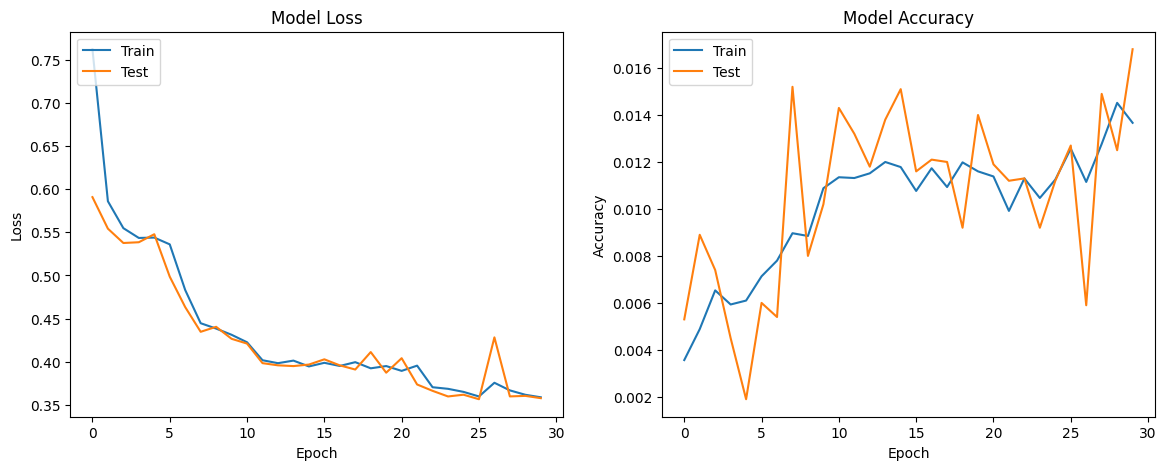

Training Loss: 0.358726441860199
Training Accuracy: 0.01366666704416275
Validation Loss: 0.3577199876308441
Validation Accuracy: 0.01679999940097332
Showing Images


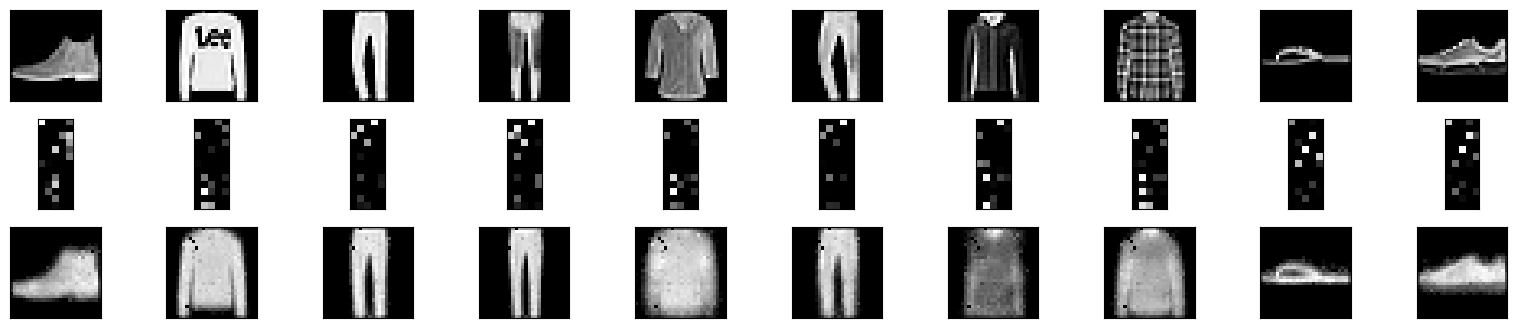

Creating Network with Batch Normalization and Regularization...
Training Network
Epoch 1/30
235/235 [==============================] - 9s 16ms/step - loss: 15.8232 - accuracy: 0.0023 - val_loss: 13.5620 - val_accuracy: 0.0024
Epoch 2/30
235/235 [==============================] - 3s 13ms/step - loss: 12.5202 - accuracy: 0.0022 - val_loss: 11.4397 - val_accuracy: 0.0014
Epoch 3/30
235/235 [==============================] - 3s 11ms/step - loss: 10.4948 - accuracy: 0.0023 - val_loss: 9.8159 - val_accuracy: 0.0016
Epoch 4/30
235/235 [==============================] - 3s 11ms/step - loss: 8.8609 - accuracy: 0.0030 - val_loss: 8.4309 - val_accuracy: 0.0018
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 7.4893 - accuracy: 0.0036 - val_loss: 7.2049 - val_accuracy: 0.0016
Epoch 6/30
235/235 [==============================] - 3s 14ms/step - loss: 6.1737 - accuracy: 0.0025 - val_loss: 6.0189 - val_accuracy: 8.0000e-04
Epoch 7/30
235/235 [==============================] 

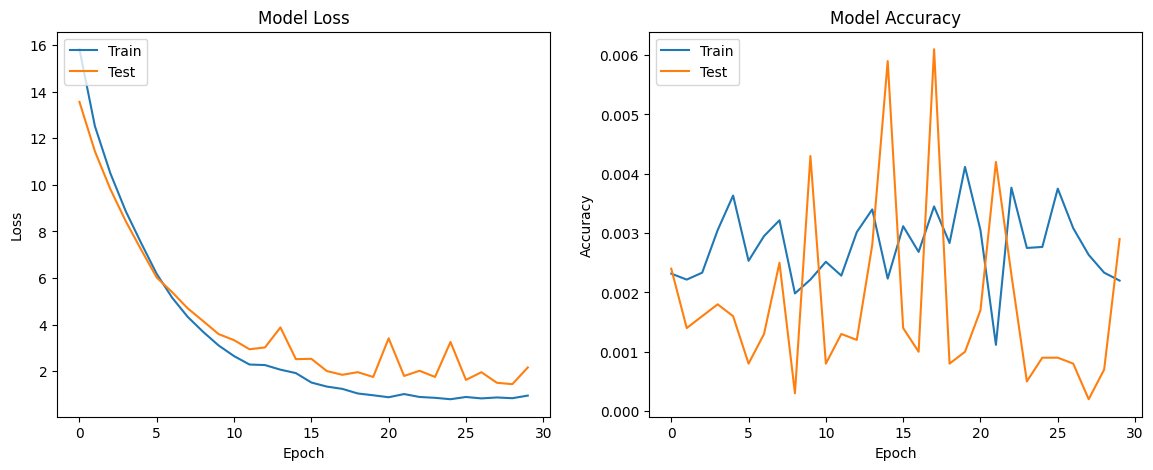

Training Loss: 0.9504675269126892
Training Accuracy: 0.002199999988079071
Validation Loss: 2.1584091186523438
Validation Accuracy: 0.002899999963119626
Showing Images


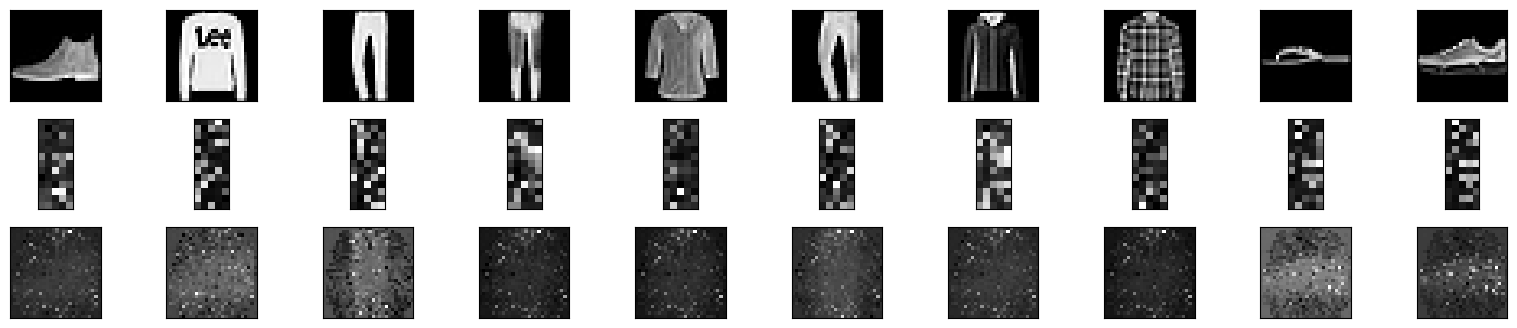

In [ ]:
#Part 2

AutoEnc = AutoEncoder()
AutoEnc.PrepareDataset()
AutoEnc.CreateNetwork()
AutoEnc.Train(30)
AutoEnc.evaluation()
AutoEnc.Display()



AutoEnc_wbath = AutoEncoder()
AutoEnc_wbath.PrepareDataset()
AutoEnc_wbath.CreateNetwork_with_batch_regul()
AutoEnc_wbath.Train(30)
AutoEnc_wbath.evaluation()
AutoEnc_wbath.Display()

In [ ]:

###############
###############
###############
###############
###############

In [ ]:
#Part3
#import


from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D, Flatten, Dense,UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Part3
#class


class AutoEncoder:
    def ___init(self):
        self.x_train=None
        self.x_test=None
        self.x_train_noisy=None
        self.x_test_noisy=None
        self.Model=None
        self.encode = None
        self.encoded_imgs = None
        self.predicted = None
        self.history = None

    def CreateNetwork(self):
        #Encoder Definition
        print("Creating Network...")
        input_img = layers.Input(shape=(784,))
        Encoder = layers.Dense(400, activation='relu')(input_img)
        Encoder = layers.Dense(150, activation='relu')(Encoder)
        LatentSpace = layers.Dense(65, activation='relu')(Encoder)#buttle neck layer

        # Decoder Definition

        Decoder = layers.Dense(150, activation='relu')(LatentSpace)
        Decoder = layers.Dense(400, activation='relu')(Decoder)
        decoded = layers.Dense(784, activation='relu')(Decoder)

        self.Model = keras.Model(input_img, decoded)
        self.encode = keras.Model(input_img, LatentSpace)
        self.Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def Train_With_noise(self,_epochs=20):
        print("Training Network")
        self.history= self.Model.fit(self.x_train_noisy, self.x_train,
                    epochs=_epochs,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(self.x_test_noisy, self.x_test),
                    callbacks=[TensorBoard(log_dir='C://Users//alireza//Desktop//FTS_CA2', histogram_freq=0, write_graph=False)])

        self.encoded_imgs = self.encode.predict(self.x_test)
        self.predicted = self.Model.predict(self.x_test)

    def Train(self,_epochs=20):
        print("Training Network")
        self.history = self.Model.fit(self.x_train, self.x_train,
                    epochs=_epochs,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(self.x_test, self.x_test),
                    callbacks=[TensorBoard(log_dir='C://Users//alireza//Desktop//FTS_CA2', histogram_freq=0, write_graph=False)])

        self.encoded_imgs = self.encode.predict(self.x_test)
        self.predicted = self.Model.predict(self.x_test)

    def PrepareDataset(self):
        (self.x_train, _), (self.x_test, _) = fashion_mnist.load_data()
        self.x_train = self.x_train.astype('float32') / 255.
        self.x_test = self.x_test.astype('float32') / 255.

        self.x_train = self.x_train.reshape((len(self.x_train), np.prod(self.x_train.shape[1:])))
        self.x_test = self.x_test.reshape((len(self.x_test), np.prod(self.x_test.shape[1:])))

    def Display(self):
        print("Showing Images")
        plt.figure(figsize = (40, 4))
        for i in range(10):
            #display original images
            ax = plt.subplot(4, 20, i+1)
            plt.imshow(self.x_test[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            #display noised images
            ax = plt.subplot(4, 20, i+1+20)
            plt.imshow(self.x_test_noisy[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_xaxis().set_visible(False)


            #disply encoded images
            ax = plt.subplot(4, 20, 2*20+i+1)
            plt.imshow(self.encoded_imgs[i].reshape(5,13))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            #display reconstruction images
            ax = plt.subplot(4, 20 , 3*20+i+1)
            plt.imshow(self.predicted[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()
    def FaultInject(self,noise_factor = 0.5):

        self.x_train_noisy = self.x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_train.shape)
        self.x_test_noisy = self.x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_test.shape)

        self.x_train_noisy = np.clip(self.x_train_noisy, 0., 1.)
        self.x_test_noisy = np.clip(self.x_test_noisy, 0., 1.)

    def evaluation(self):
        plt.figure(figsize=(14,5))
        plt.subplot(1,2,1)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')

        plt.subplot(1,2,2)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
        print(f'Training Loss: {self.history.history["loss"][-1]}')
        print(f'Training Accuracy: {self.history.history["accuracy"][-1]}')
        print(f'Validation Loss: {self.history.history["val_loss"][-1]}')
        print(f'Validation Accuracy: {self.history.history["val_accuracy"][-1]}')

    def CreateNetwork_with_batch_regul(self):
        print("Creating Network with Batch Normalization and Regularization...")
        input_img = layers.Input(shape=(784,))
        Encoder = layers.Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)
        Encoder = BatchNormalization()(Encoder)
        Encoder = layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Encoder)
        Encoder = BatchNormalization()(Encoder)
        Encoder = layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Encoder)
        Encoder = BatchNormalization()(Encoder)
        LatentSpace = layers.Dense(65, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Encoder)#buttle neck layer
        LatentSpace = BatchNormalization()(LatentSpace)

        Decoder = layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01))(LatentSpace)
        Decoder = BatchNormalization()(Decoder)
        Decoder = layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Decoder)
        Decoder = BatchNormalization()(Decoder)
        Decoder = layers.Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Decoder)
        Decoder = BatchNormalization()(Decoder)
        decoded = layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.01))(Decoder)
        decoded = BatchNormalization()(decoded)

        self.Model = keras.Model(input_img, decoded)
        self.encode = keras.Model(input_img, LatentSpace)
        self.Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





Creating Network...
Training Network
Epoch 1/30
469/469 [==============================] - 6s 8ms/step - loss: 0.7837 - accuracy: 0.0035 - val_loss: 0.6516 - val_accuracy: 0.0154
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.6347 - accuracy: 0.0054 - val_loss: 0.6284 - val_accuracy: 0.0048
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5812 - accuracy: 0.0061 - val_loss: 0.5621 - val_accuracy: 0.0043
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5509 - accuracy: 0.0082 - val_loss: 0.5417 - val_accuracy: 0.0070
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5280 - accuracy: 0.0090 - val_loss: 0.5145 - val_accuracy: 0.0155
Epoch 6/30
469/469 [==============================] - 4s 7ms/step - loss: 0.5111 - accuracy: 0.0105 - val_loss: 0.4980 - val_accuracy: 0.0078
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5015 - accuracy: 0.0123 - val_loss:

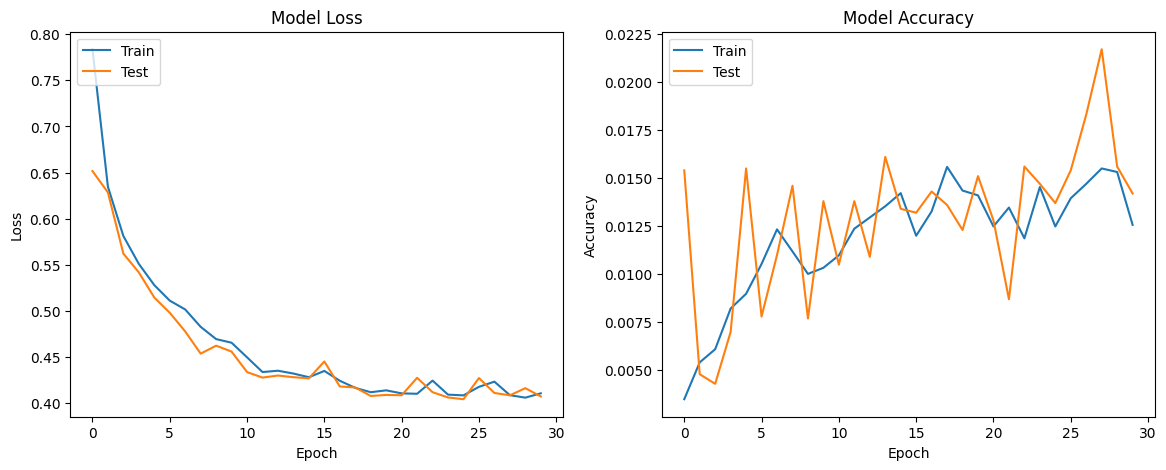

Training Loss: 0.41060107946395874
Training Accuracy: 0.012566667050123215
Validation Loss: 0.40720051527023315
Validation Accuracy: 0.0142000000923872
Showing Images


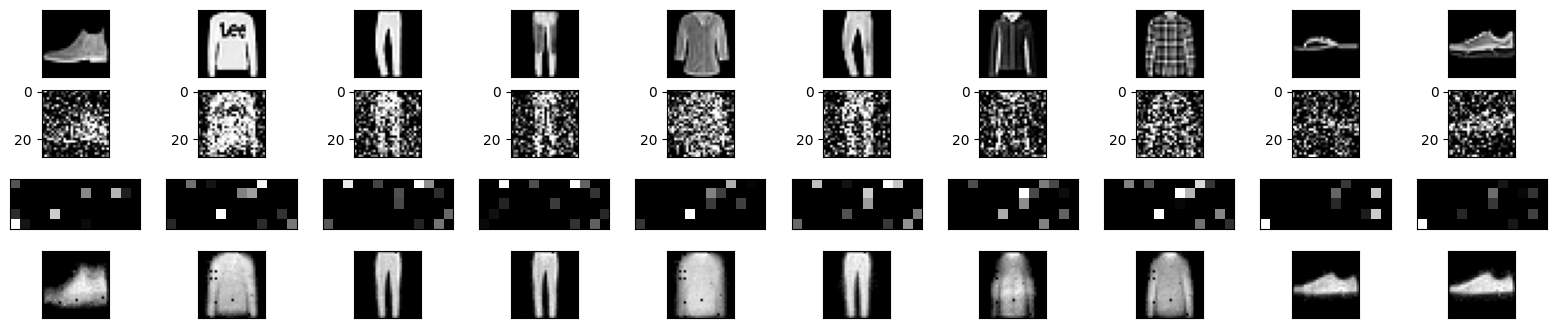

In [ ]:
#Part 3

AutoEnc = AutoEncoder()
AutoEnc.PrepareDataset()
AutoEnc.CreateNetwork()
AutoEnc.FaultInject(0.5)
AutoEnc.Train_With_noise(30)
AutoEnc.evaluation()
AutoEnc.Display()



In [9]:
#Part4
#import
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Lambda, Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy, SparseCategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Part4
#class

class VariationalAutoencoder:
    def __init__(self, latent_dim=2, batch_size=100, num_classes=10):
        self.latent_dim = latent_dim
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.classifier = None
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.x_val = None
        self.y_val = None
    def prepare_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        self.x_train = self.x_train.astype('float32') / 255.
        self.x_test = self.x_test.astype('float32') / 255.
        self.x_train = self.x_train.reshape((len(self.x_train), np.prod(self.x_train.shape[1:])))
        self.x_test = self.x_test.reshape((len(self.x_test), np.prod(self.x_test.shape[1:])))

    def sampling(self, args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], self.latent_dim), mean=0., stddev=0.1)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    def build_and_compile_autoencoder(self, input_shape=(784,)):
        # Encoder
        inputs = Input(shape=input_shape, name='encoder_input')
        x = Dense(512, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim, name='z_mean')(x)
        z_log_var = Dense(self.latent_dim, name='z_log_var')(x)
        z = Lambda(self.sampling, output_shape=(self.latent_dim,), name='z')([z_mean, z_log_var])
        self.encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

        # Decoder
        latent_inputs = Input(shape=(self.latent_dim,), name='z_sampling')
        x = Dense(512, activation='relu')(latent_inputs)
        outputs = Dense(input_shape[0], activation='sigmoid')(x)
        self.decoder = Model(latent_inputs, outputs, name='decoder')

        # VAE
        outputs = self.decoder(self.encoder(inputs)[2])
        self.autoencoder = Model(inputs, outputs, name='vae')

        # Loss
        reconstruction_loss = binary_crossentropy(inputs, outputs) * input_shape[0]
        kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
        kl_loss = K.sum(kl_loss, axis=-1) * -0.5
        vae_loss = K.mean(reconstruction_loss + kl_loss)
        self.autoencoder.add_loss(vae_loss)
        self.autoencoder.compile(optimizer='adam')

    def build_and_compile_classifier(self, input_shape=(2,)):
        # Classifier
        inputs = Input(shape=input_shape, name='classifier_input')
        x = Dense(512, activation='relu')(inputs)
        outputs = Dense(self.num_classes, activation='softmax')(x)
        self.classifier = Model(inputs, outputs, name='classifier')
        self.classifier.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    def train_autoencoder(self, epochs=100):
        self.autoencoder.fit(self.x_train, epochs=epochs, batch_size=self.batch_size, validation_data=(self.x_test, None))

    def train_classifier(self, epochs=100):
        x_train_encoded = vae.encoder.predict(self.x_train)[2]
        x_test_encoded = vae.encoder.predict(self.x_test)[2]
        self.classifier.fit(x_train_encoded, self.y_train, epochs=epochs, batch_size=self.batch_size, validation_data=(x_test_encoded, self.y_test))

    def generate_and_print_images(self):
        z_sample = np.array([[xi, yi] for xi in np.linspace(-3, 3, 10) for yi in np.linspace(-3, 3, 10)])
        x_decoded = self.decoder.predict(z_sample)

        # Print the first 10 images
        for i, image in enumerate(x_decoded[:10]):
            plt.subplot(2, 5, i+1)
            plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.show()





Epoch 1/30
600/600 [==============================] - 5s 4ms/step - loss: 294.4509 - val_loss: 277.1377
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 271.5720 - val_loss: 269.9534
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 267.7198 - val_loss: 267.6739
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 265.6958 - val_loss: 266.4447
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 264.2961 - val_loss: 265.0045
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 263.1865 - val_loss: 264.1960
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 262.2007 - val_loss: 263.0113
Epoch 8/30
600/600 [==============================] - 3s 5ms/step - loss: 261.4214 - val_loss: 262.4658
Epoch 9/30
600/600 [==============================] - 3s 5ms/step - loss: 260.8419 - val_loss: 261.7813
Epoch 10/30
600/600 [==============================] - 3s 5ms/st

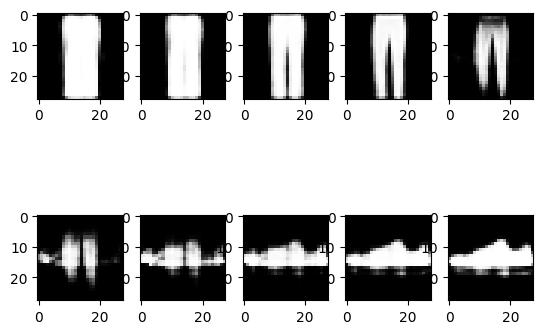

In [11]:
vae = VariationalAutoencoder()
vae.prepare_dataset() # prepare the dataset before training
vae.build_and_compile_autoencoder()
vae.train_autoencoder(epochs=30)

# Build and train the classifier
vae.build_and_compile_classifier()
vae.train_classifier(epochs=30)

# Generate and print images
vae.generate_and_print_images()